<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/%C4%90i%E1%BB%81u_khi%E1%BB%83n_Mobie_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6d8b876d21bc877f49edbab44f72d5ff466715cba6f98d4f7728e09994c24891
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [8]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
import threading as td

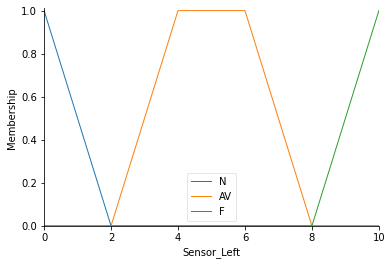

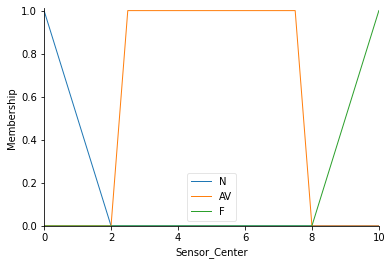

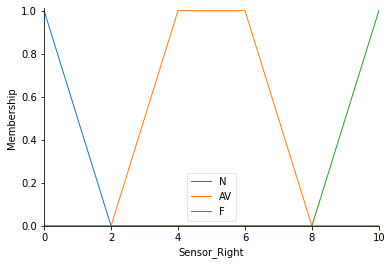

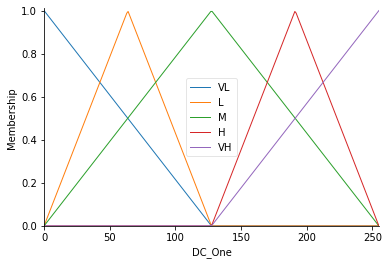

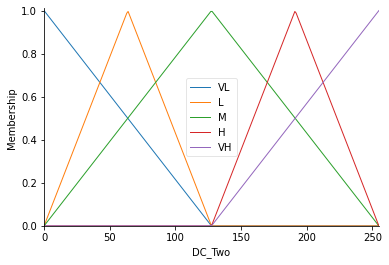

In [9]:
Sensor_Left = ctrl.Antecedent(np.arange(0,10.1,0.1),'Sensor_Left')
Sensor_Center = ctrl.Antecedent(np.arange(0,10.1,0.1),'Sensor_Center')
Sensor_Right = ctrl.Antecedent(np.arange(0,10.1,0.1),'Sensor_Right')

DC_One = ctrl.Consequent(np.arange(0,256,1),'DC_One')
DC_Two = ctrl.Consequent(np.arange(0,256,1),'DC_Two')




Sensor_Left['N']= fuzz.trimf(Sensor_Left.universe,[0,0,2])
Sensor_Left['AV']= fuzz.trapmf(Sensor_Left.universe,[2,4,6,8])
Sensor_Left['F']= fuzz.trimf(Sensor_Left.universe,[8,10,10])
Sensor_Left.view()

Sensor_Center['N']= fuzz.trimf(Sensor_Center.universe,[0,0,2])
Sensor_Center['AV']= fuzz.trapmf(Sensor_Center.universe,[2,2.5,7.5,8])
Sensor_Center['F']= fuzz.trimf(Sensor_Center.universe,[8,10,10])
Sensor_Center.view()

Sensor_Right['N']= fuzz.trimf(Sensor_Right.universe,[0,0,2])
Sensor_Right['AV']= fuzz.trapmf(Sensor_Right.universe,[2,4,6,8])
Sensor_Right['F']= fuzz.trimf(Sensor_Right.universe,[8,10,10])
Sensor_Right.view()

DC_One['VL']= fuzz.trimf(DC_One.universe,[0,0,255/2])
DC_One['L']= fuzz.trimf(DC_One.universe,[0,255/4,255/2])
DC_One['M']= fuzz.trimf(DC_One.universe,[0,255/2,255])
DC_One['H']= fuzz.trimf(DC_One.universe,[255/2,255*3/4,255])
DC_One['VH']= fuzz.trimf(DC_One.universe,[255/2,255,255])
DC_One.view()

DC_Two['VL']= fuzz.trimf(DC_Two.universe,[0,0,255/2])
DC_Two['L']= fuzz.trimf(DC_Two.universe,[0,255/4,255/2])
DC_Two['M']= fuzz.trimf(DC_Two.universe,[0,255/2,255])
DC_Two['H']= fuzz.trimf(DC_Two.universe,[255/2,255*3/4,255])
DC_Two['VH']= fuzz.trimf(DC_Two.universe,[255/2,255,255])
DC_Two.view()

In [10]:
#Luật cho động cơ one

rule_1 = ctrl.Rule(Sensor_Left['N']&Sensor_Center['N'],DC_One['H'])
rule_2 = ctrl.Rule(Sensor_Left['N']&Sensor_Center['AV'],DC_One['VH'])
rule_3 = ctrl.Rule(Sensor_Left['N']&Sensor_Center['F'],DC_One['M'])
rule_4 = ctrl.Rule(Sensor_Left['AV']&Sensor_Center['N'],DC_One['M'])
rule_5 = ctrl.Rule(Sensor_Left['AV']&Sensor_Center['AV'],DC_One['VH'])
rule_6 = ctrl.Rule(Sensor_Left['AV']&Sensor_Center['F'],DC_One['VL'])
rule_7 = ctrl.Rule(Sensor_Left['F']&Sensor_Center['N'],DC_One['M'])
rule_8 = ctrl.Rule(Sensor_Left['F']&Sensor_Center['AV'],DC_One['VL'])
rule_9 = ctrl.Rule(Sensor_Left['F']&Sensor_Center['F'],DC_One['VH'])


rule_11 = ctrl.Rule(Sensor_Right['N']&Sensor_Center['N']&Sensor_Right['N'],DC_One['H'],DC_Two['L'])

#Luật cho động cơ two

rule_1_2 = ctrl.Rule(Sensor_Right['N']&Sensor_Center['N'],DC_Two['H'])
rule_2_2 = ctrl.Rule(Sensor_Right['N']&Sensor_Center['AV'],DC_Two['VH'])
rule_3_2 = ctrl.Rule(Sensor_Right['N']&Sensor_Center['F'],DC_Two['M'])
rule_4_2 = ctrl.Rule(Sensor_Right['AV']&Sensor_Center['N'],DC_Two['M'])
rule_5_2 = ctrl.Rule(Sensor_Right['AV']&Sensor_Center['AV'],DC_Two['VH'])
rule_6_2 = ctrl.Rule(Sensor_Right['AV']&Sensor_Center['F'],DC_Two['VL'])
rule_7_2 = ctrl.Rule(Sensor_Right['F']&Sensor_Center['N'],DC_Two['M'])
rule_8_2 = ctrl.Rule(Sensor_Right['F']&Sensor_Center['AV'],DC_Two['VL'])
rule_9_2 = ctrl.Rule(Sensor_Right['F']&Sensor_Center['F'],DC_Two['VH'])

rule_11_2 = ctrl.Rule(Sensor_Left['N']&Sensor_Center['N']&Sensor_Right['N'],DC_Two['L'],DC_One['H'])


PWM Động cơ bên phải: 212.49869283056037
PWM Động cơ bên trái: 205.41506902331872


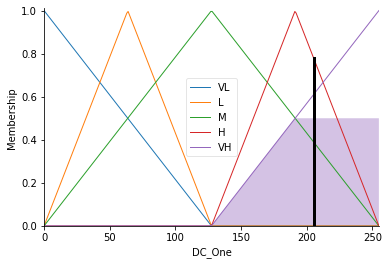

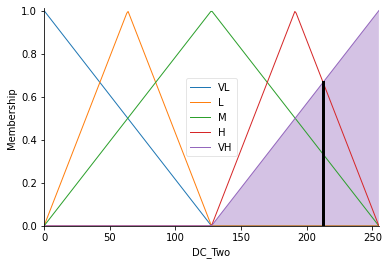

In [15]:
def TINH_TOAN_DC_ONE (sen_left,sen_front, sen_right):
  powering_DC_One_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_11])
  powering_DC_One = ctrl.ControlSystemSimulation(powering_DC_One_ctrl)
  powering_DC_One.input['Sensor_Left'] = sen_left        
  powering_DC_One.input['Sensor_Center'] = sen_front       
  powering_DC_One.input['Sensor_Right'] = sen_right       
  powering_DC_One.compute()
  DC_One.view(sim = powering_DC_One)
  print("PWM Động cơ bên trái:",powering_DC_One.output['DC_One'])


def TINH_TOAN_DC_TWO (sen_left,sen_front, sen_right):
  powering_DC_Two_ctrl = ctrl.ControlSystem([rule_1_2,rule_2_2,rule_3_2,rule_4_2,rule_5_2,rule_6_2,rule_7_2,rule_8_2,rule_9_2,rule_11_2])
  powering_DC_Two = ctrl.ControlSystemSimulation(powering_DC_Two_ctrl)
  powering_DC_Two.input['Sensor_Left'] = sen_left     
  powering_DC_Two.input['Sensor_Center'] = sen_front       
  powering_DC_Two.input['Sensor_Right'] = sen_right       
  powering_DC_Two.compute()

  print("PWM Động cơ bên phải:",powering_DC_Two.output['DC_Two'])
  DC_Two.view(sim = powering_DC_Two)


#Biến đầu vào
sen_L = 7
sen_F = 5
sen_R = 4
#chạy đa luồng

DC_1 = td.Thread(target=TINH_TOAN_DC_ONE, args=(sen_L, sen_F, sen_R))
DC_2 = td.Thread(target=TINH_TOAN_DC_TWO, args=(sen_L, sen_F, sen_R))
DC_1.start()
DC_2.start()
DC_1.join()
DC_2.join()